In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import io
print(sklearn.__version__)

1.2.2


In [4]:
df = pd.read_csv('Thyroid.csv')

In [5]:
df.head(8)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019


In [6]:
df.shape

(9172, 31)

In [7]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [8]:
df = df.drop(['patient_id', 'referral_source'],axis = 1)

In [9]:
print(df.shape)
df.isna().sum()

(9172, 29)


age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
target                    0
dtype: int64

In [10]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [11]:
null_num_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in null_num_columns:
  df[col].fillna(df[col].mean(),inplace=True)

In [12]:
df.isna().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
target                 0
dtype: int64

In [13]:
df.loc[4]

age                            32
sex                             F
on_thyroxine                    f
query_on_thyroxine              f
on_antithyroid_meds             f
sick                            f
pregnant                        f
thyroid_surgery                 f
I131_treatment                  f
query_hypothyroid               f
query_hyperthyroid              f
lithium                         f
goitre                          f
tumor                           f
hypopituitary                   f
psych                           f
TSH_measured                    f
TSH                      5.218403
T3_measured                     f
T3                       1.970629
TT4_measured                    f
TT4                    108.700305
T4U_measured                    f
T4U                      0.976056
FTI_measured                    f
FTI                    113.640746
TBG_measured                    t
TBG                          36.0
target                          S
Name: 4, dtype

In [14]:
df.dtypes

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
target                  object
dtype: object

In [15]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured', 'target']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = labelencoder.fit_transform(df[col])

In [17]:
df.dtypes

age                      int64
sex                      int64
on_thyroxine             int64
query_on_thyroxine       int64
on_antithyroid_meds      int64
sick                     int64
pregnant                 int64
thyroid_surgery          int64
I131_treatment           int64
query_hypothyroid        int64
query_hyperthyroid       int64
lithium                  int64
goitre                   int64
tumor                    int64
hypopituitary            int64
psych                    int64
TSH_measured             int64
TSH                    float64
T3_measured              int64
T3                     float64
TT4_measured             int64
TT4                    float64
T4U_measured             int64
T4U                    float64
FTI_measured             int64
FTI                    float64
TBG_measured             int64
TBG                    float64
target                   int64
dtype: object

In [18]:
df['target'].unique()

array([ 0, 31,  9,  2, 30, 16, 22, 25, 11, 18,  1, 19, 20, 24, 29, 17,  5,
       26, 21, 15,  6, 13, 23, 28, 10,  3, 12,  4, 14, 27,  7,  8])

In [19]:
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

In [55]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.70)

In [56]:
X_train = train[features]
Y_train = train['target']

X_test = test[features]
Y_test = test['target']

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [58]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [59]:
model.score(X_test, Y_test)

0.9487645348837209

In [60]:
Y_pred = model.predict(X_test)
print(Y_pred)

[ 0 18  0 ...  0  0  0]


In [61]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2061
           1       0.75      0.89      0.81        37
           2       0.71      0.91      0.80        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       0.93      0.96      0.94        69
          10       0.00      0.00      0.00         1
          11       0.97      1.00      0.99       112
          12       1.00      0.60      0.75         5
          13       0.92      1.00      0.96        12
          15       1.00      1.00      1.00         1
          16       0.88      0.82      0.85        99
          17       1.00      0.50      0.67         2
          18       0.82      0.94      0.87       130
          19       0.33    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
cm = confusion_matrix(Y_test, Y_pred)


Text(95.72222222222221, 0.5, 'real')

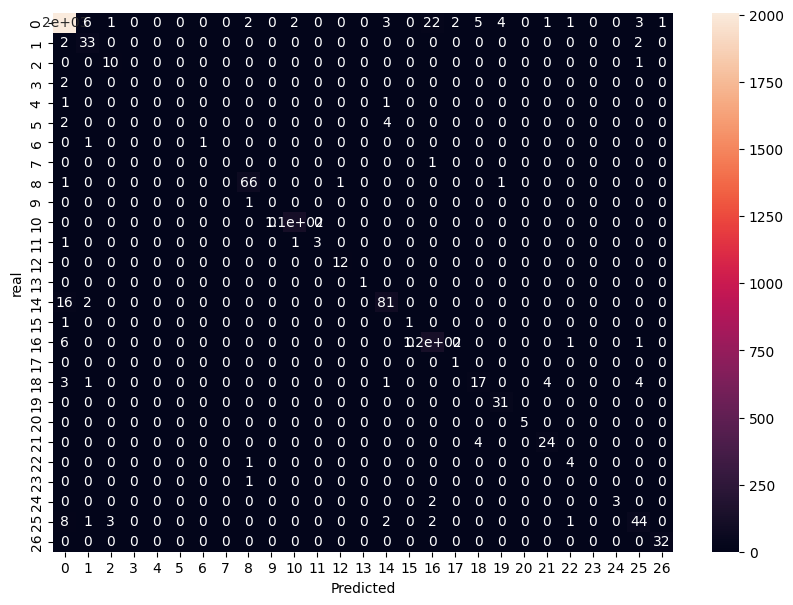

In [63]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [64]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  94.88 %,  2611.0 correct detections
Inaccuracy:  5.12 %,  141.0 Incorrect detections


**Map Predicted Integers Back to Labels**

In [65]:
#mapping from integer to thyroid condition labels
int_to_label = {
    0: '-', 1: 'A', 2: 'AK', 3: 'B', 4: 'C', 5: 'C|I', 6: 'D', 7: 'D|R', 8: 'E',
    9: 'F', 10: 'FK', 11: 'G', 12: 'GI', 13: 'GK', 14: 'GKJ', 15: 'H|K', 16: 'I',
    17: 'J', 18: 'K', 19: 'KJ', 20: 'L', 21: 'LJ', 22: 'M', 23: 'MI', 24: 'MK',
    25: 'N', 26: 'O', 27: 'OI', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T'
}

#mapping from labels to descriptive names
label_to_name = {
    '-': 'No thyroid condition',
    'A': 'hyperthyroid',
    'B': 'T3 toxic',
    'C': 'toxic goitre',
    'C|I': 'toxic goitre with increased binding protein',
    'D': 'secondary toxic',
    'D|R': 'secondary toxic with discordant assay results',
    'E': 'hypothyroid',
    'F': 'primary hypothyroid',
    'FK': 'primary hypothyroid with concurrent non-thyroidal illness',
    'G': 'compensated hypothyroid',
    'GI': 'compensated hypothyroid with increased binding protein',
    'GK': 'compensated hypothyroid with concurrent non-thyroidal illness',
    'GKJ': 'compensated hypothyroid with concurrent non-thyroidal illness and decreased binding protein',
    'H|K': 'secondary hypothyroid with concurrent non-thyroidal illness',
    'I': 'increased binding protein',
    'J': 'decreased binding protein',
    'K': 'concurrent non-thyroidal illness',
    'KJ': 'concurrent non-thyroidal illness with decreased binding protein',
    'L': 'consistent with replacement therapy',
    'LJ': 'consistent with replacement therapy with decreased binding protein',
    'M': 'underreplaced',
    'MI': 'underreplaced with increased binding protein',
    'MK': 'underreplaced with concurrent non-thyroidal illness',
    'N': 'overreplaced',
    'O': 'antithyroid drugs',
    'OI': 'antithyroid drugs with increased binding protein',
    'P': 'I131 treatment',
    'Q': 'surgery',
    'R': 'discordant assay results',
    'S': 'elevated TBG',
    'T': 'elevated thyroid hormones',
    'AK': 'hyperthyroid with concurrent non-thyroidal illness',
    'LJ': 'consistent with replacement therapy with decreased binding protein',
    'C|I': 'toxic goitre with increased binding protein',
    'H|K': 'secondary hypothyroid with concurrent non-thyroidal illness',
    'GKJ': 'compensated hypothyroid with concurrent non-thyroidal illness and decreased binding protein'
}

In [66]:
df.loc[4]

age                     32.000000
sex                      0.000000
on_thyroxine             0.000000
query_on_thyroxine       0.000000
on_antithyroid_meds      0.000000
sick                     0.000000
pregnant                 0.000000
thyroid_surgery          0.000000
I131_treatment           0.000000
query_hypothyroid        0.000000
query_hyperthyroid       0.000000
lithium                  0.000000
goitre                   0.000000
tumor                    0.000000
hypopituitary            0.000000
psych                    0.000000
TSH_measured             0.000000
TSH                      5.218403
T3_measured              0.000000
T3                       1.970629
TT4_measured             0.000000
TT4                    108.700305
T4U_measured             0.000000
T4U                      0.976056
FTI_measured             0.000000
FTI                    113.640746
TBG_measured             1.000000
TBG                     36.000000
target                  31.000000
Name: 4, dtype

In [67]:
input_data = (
    32.000000,
    0.000000,
    0.000000,
    0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     0.000000,
     5.218403,
     0.000000,
     1.970629,
     0.000000,
     108.700305,
     0.000000,
     0.976056,
     0.000000,
     113.640746,
     1.000000,
     36.000000
)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
label = int_to_label[prediction[0]]
condition_name = label_to_name[label]

if condition_name == 'No':
  print(condition_name)
else:
  print("Thyroid detected and the condition/type is :", condition_name)

Thyroid detected and the condition/type is : elevated TBG


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Saving the trained model**

In [68]:
import pickle

In [69]:
filename = 'Thyroid_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Loading the saved model**

In [70]:
loaded_model = pickle.load(open('Thyroid_model.sav', 'rb'))

In [71]:
for columns in df.columns:
  print(columns)

age
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_meds
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH_measured
TSH
T3_measured
T3
TT4_measured
TT4
T4U_measured
T4U
FTI_measured
FTI
TBG_measured
TBG
target
